<a href="https://colab.research.google.com/github/palak001/GC-I/blob/master/Seaborn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Pandas for managing datasets
import pandas as pd

In [0]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
# Seaborn for plotting and styling
import seaborn as sns

In [0]:
!git clone https://github.com/palak001/GC-I

In [0]:
!ls GC-I

Pokemon.csv


In [0]:
import chardet

In [0]:
with open('GC-I/Pokemon.csv', 'rb') as f:
  result = chardet.detect(f.read())

df = pd.read_csv('GC-I/Pokemon.csv', encoding=result['encoding'], index_col=0)

In [0]:
# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


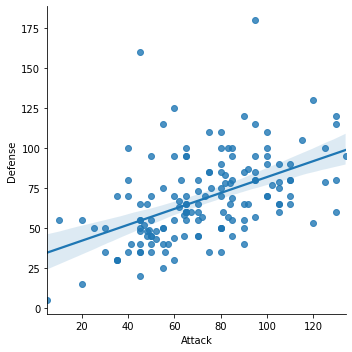

In [0]:
# Plotting Scatter plot

# Recommended way

sns.lmplot(x='Attack', y='Defense', data=df)

# # Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

# Plotting a Scatter Plot without line fitting

sns.lmplot(x="Attack", y="Defense", data=df, fit_reg=False)

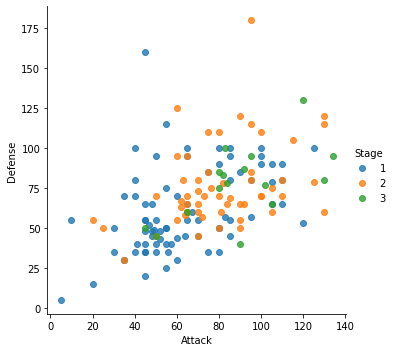

In [0]:
# giving our scatter plot a third dimension of information using color
sns.lmplot(x = 'Attack', y = 'Defense', data = df,
           fit_reg = False, # No regression line
           hue = 'Stage') #Color by evolution stage

(0.0, 140.45)

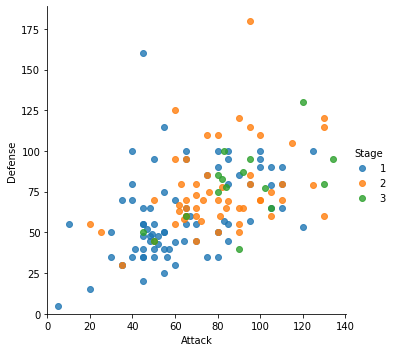

In [0]:
# Plot using Seaborn
sns.lmplot(x = 'Attack', y = 'Defense', data = df,
           fit_reg = False,
           hue = 'Stage')

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

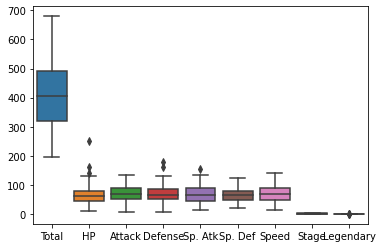

In [0]:
# Boxplot
sns.boxplot(data=df)

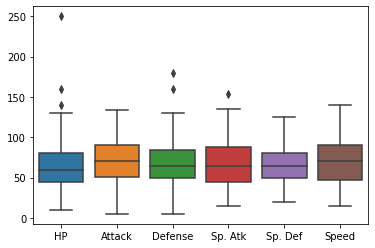

In [0]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)

# New boxplot using stats_df
sns.boxplot(data = stats_df)

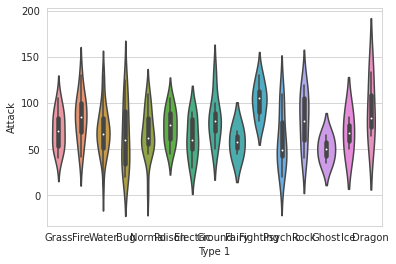

In [0]:
# Set theme
sns.set_style('whitegrid')

# Violin plot
sns.violinplot(x = 'Type 1', y = 'Attack', data = df)

In [0]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

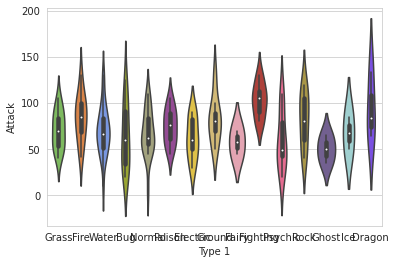

In [0]:
# Violin plot with Pokemon color palette
sns.violinplot(x = 'Type 1', y = 'Attack', data = df,
               palette = pkmn_type_colors) # Set color palette

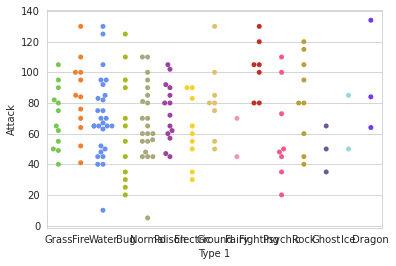

In [0]:
# Swarm plot with pokemon color palette
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df, 
              palette = pkmn_type_colors)

Text(0.5, 1.0, 'Attack by type')

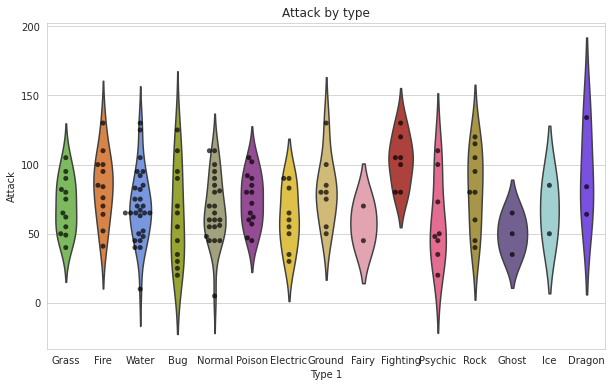

In [0]:
# Set figure size with matplotlib
plt.figure(figsize = (10, 6))

# Create plot
sns.violinplot(x = 'Type 1',
               y = 'Attack',
               data = df,
               inner = None, # Remove the bars inside the violins
               palette = pkmn_type_colors)

sns.swarmplot(x = 'Type 1',
              y = 'Attack', 
              data = df,
              color = 'k',
              alpha = 0.7)

# Set title with matplotlib
plt.title('Attack by type')

In [0]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [0]:
# Melt DataFrame

melted_df = pd.melt(stats_df,
                    id_vars = ["Name", "Type 1", "Type 2"],
                    var_name = "Stat")
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [0]:
# Printing the shape of two dataframes
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


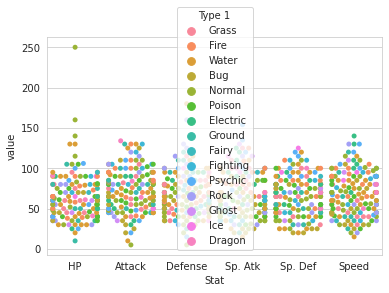

In [0]:
# Making a swarm plot with meld_df

sns.swarmplot(x = 'Stat',
              y = 'value',
              data = melted_df,
              hue = 'Type 1')

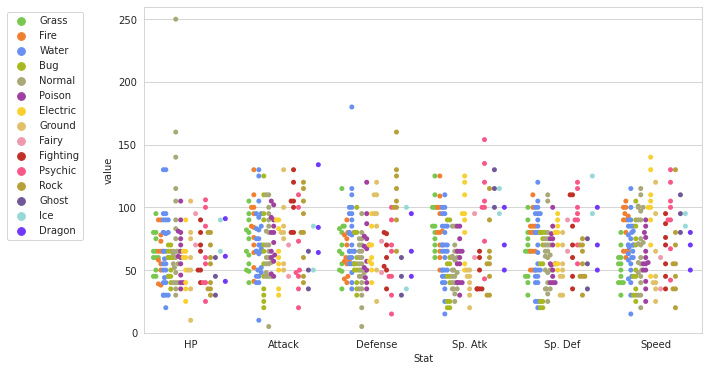

In [0]:
# few tweaks to beautify our plot

# setting up size of our plot
plt.figure(figsize=(10, 6))

sns.swarmplot(x = 'Stat',
              y = 'value',
              data = melted_df,
              hue = 'Type 1',
              dodge = True, 
              palette = pkmn_type_colors)

# Tweak using Matplotlib
plt.ylim(0, 260)
# plt.ylim(0, None)

# Adjusting the legend
plt.legend(bbox_to_anchor = (-0.1, 1))

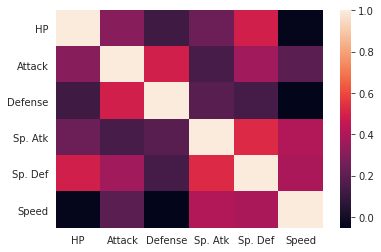

In [0]:
# Heatmap
# Calculate correlations
corr = stats_df.corr()

# heatmap
sns.heatmap(corr)

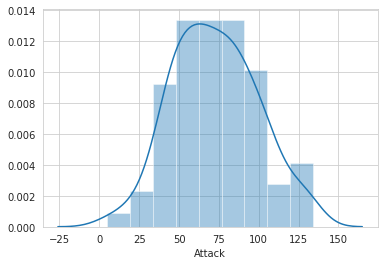

In [0]:
# Distribution Plot
sns.distplot(df.Attack)

# count plot
sns.countplot(x = 'Type 1', data = df, palette=pkmn_type_colors)

# Rotat x-labels
plt.xticks(rotation = 45)

In [0]:
# Factor plot
g = sns.factorplot(x = 'Type 1',
                   y = 'Attack',
                   data = df,
                   hue = 'Stage',
                   col = 'Stage',
                   kind='swarm')

#Rotate x-axis labels
g.set_xticklabels(rotation=-45)

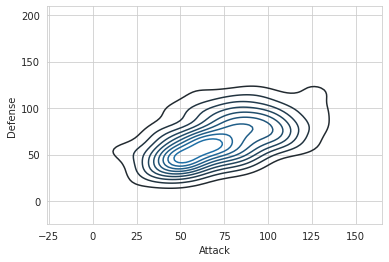

In [0]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

In [0]:
# Joint Distribution Plot
sns.jointplot(x = 'Attack', y = 'Defense', data = df)